In [60]:
# 1. Gerekli Kütüphaneleri Yüklenmesi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Pandas, Numpy, Matplotlib, Scikit-Learn gibi temel kütüphaneleri yükledik.


In [62]:
# 2. Veri Setinin Yüklenmesi

# Veri setini yükledik.
df = pd.read_csv('california_housing.csv')

# İlk birkaç satırı gösterdik.
df.head()

# Veri setinin özelliklerini kontrol ettik.
df.info()

# Özet
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [64]:
# 3. Veri Temizleme ve Ön İşleme

#Veri setinde boş satır olmadığını gördük.

# Gereksiz sütunları kaldırdık.
df = df.drop(['longitude', 'latitude'], axis=1)

# Uç Değerlerin Tespiti ve Temizlenmesi
# Uç değerleri tespit etmek için IQR (Interquartile Range) yöntemini kullandık.
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin belirlenmesi için alt ve üst sınırları belirledik.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Yeniden bir veri seti oluşturup adını df_temizlenmis olarak değiştirdik.
df_temizlenmis = df[(df['median_house_value'] >= lower_bound) & (df['median_house_value'] <= upper_bound)]


In [66]:
# 4. Model Oluşturma ve Eğitme
# Basit bir lineer regresyon modeli oluşturup, "median_income" (Medyan Gelir) ve "total_rooms" (Toplam Oda Sayısı) özelliklerini kullanarak "median_house_value" (Medyan Ev Değeri) tahmin edeceğiz.

# Veriyi Bağımlı ve Bağımsız Değişkenlere ayırdık.
X = df_temizlenmis[['median_income', 'total_rooms']]  # Bağımsız değişkenler (Medyan Gelir ve Toplam Oda Sayısı)
y = df_temizlenmis['median_house_value']  # Bağımlı değişken (Medyan Ev Değeri)

# Veriyi Eğitim ve Test Setlerine böldük.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer Regresyon Modeli Oluşturup ve eğittik.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# 5. Tahminler Yapma
# Test seti üzerinde tahminler yaptık.

y_pred = model.predict(X_test)

# Eğitim seti üzerinde de tahminler yaparak modelin eğitimdeki performansını kontrol ettik.
y_train_pred = model.predict(X_train)

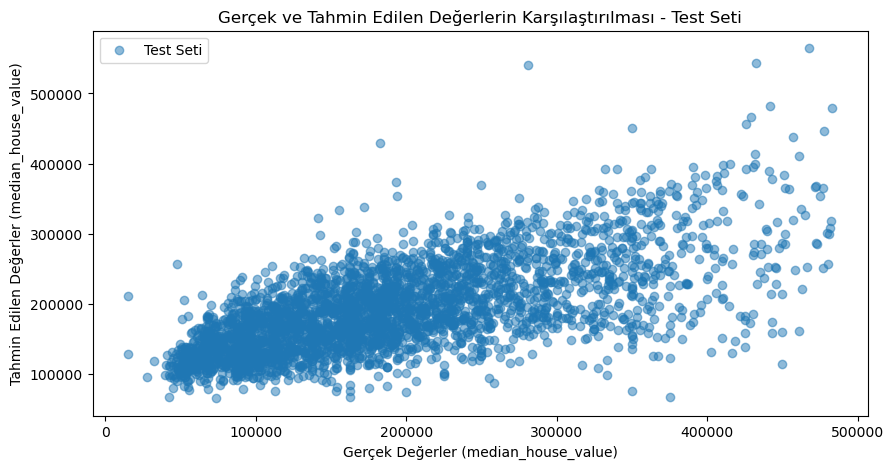

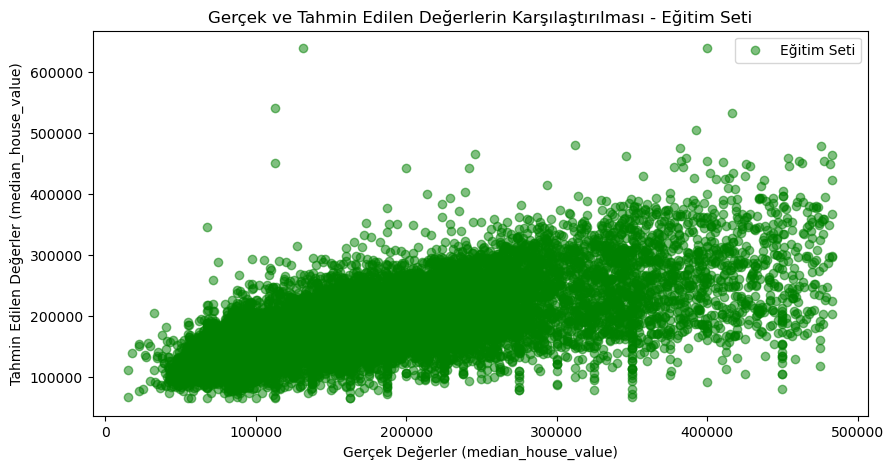

In [38]:
# 6. Sonuçları Görselleştirme
# Gerçek değerler ile tahmin edilen değerleri karşılaştırdık.

# Test seti sonuçları
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, label='Test Seti')
plt.xlabel("Gerçek Değerler (median_house_value)")
plt.ylabel("Tahmin Edilen Değerler (median_house_value)")
plt.title("Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması - Test Seti")
plt.legend()
plt.show()

# Eğitim seti sonuçları
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, alpha=0.5, color='green', label='Eğitim Seti')
plt.xlabel("Gerçek Değerler (median_house_value)")
plt.ylabel("Tahmin Edilen Değerler (median_house_value)")
plt.title("Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması - Eğitim Seti")
plt.legend()
plt.show()

In [70]:
# 7. Sonuçların Yorumlanması
# Modelin performansını değerlendirmek için hem test hem de eğitim seti üzerindeki ortalama mutlak hata (MAE) değerlerine baktık.

mae_test = mean_absolute_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# MAE'yi oransal olarak ifade edelim
mean_value = y.mean()
mae_test_ratio = (mae_test / mean_value) * 100
mae_train_ratio = (mae_train / mean_value) * 100

print(f"Ortalama Mutlak Hata (MAE) - Test Seti: {mae_test} ({mae_test_ratio:.2f}%)")
print(f"Ortalama Mutlak Hata (MAE) - Eğitim Seti: {mae_train} ({mae_train_ratio:.2f}%)")

# Modelin performansını değerlendirdik. Düşük MAE değerinin daha iyi sonuç vereceğini biliyoruz. Modelimizin test ve eğitim setinde hata oranının yüksek olduğunu gördük.

Ortalama Mutlak Hata (MAE) - Test Seti: 55380.79577232661 (28.98%)
Ortalama Mutlak Hata (MAE) - Eğitim Seti: 55982.18110499638 (29.30%)


In [ ]:
# Modelin basit olması ve ev fiyatlarının (medyan gelir ve toplam oda sayısı) ile sadece lineer ilişki kurmak yeterli olmayabileceği çıkarımını yapabiliriz.
# Mevcut modelde sadece median_income ve total_rooms değişkenlerini kullandık. Ancak, housing_median_age, total_bedrooms, population, households gibi diğer özellikler de konut fiyatlarını etkileyen faktörlerdir. Bu özelliklerin modele eklenmesi, tahmin doğruluğunu artırabilir.
# Veri temizliğine daha fazla önem vererek daha doğru sonuçlara ulaşabiliriz.
